In [259]:
# question 1:
num = int(input ('write a number in base 10:'))
num8 = num
num16 = num
str2=""
str8=""
str16=""

# Base 2:
# I take the modulo by the number 2 and add it to the string.
# I divide the number by 2, do so until the number becomes 0.
# All the modulo from the end to the beginning is the final string.
while num!=0:
    str2 = str(num%2)+str2
    num=int(num/2)
print (str2)

# Base 8: Same as base 2, just replace 2 with 8:
while num8!=0:
    str8 = str(num8%8)+str8
    num8=int(num8/8)
print (str8)

# Base 16: Same as base 2, just replace 2 with 16.
# When the modulo comes out a number between 10-15,
# I replaced it with the letters A-F.
while num16!=0:
    string = str(num16%16)
    if string == '10':
        string = "A"
    elif string == '11':
        string = "B"
    elif string == '12':
        string = "C"
    elif string == '13':
        string = "D"
    elif string == '14':
        string = "E"
    elif string == '15':
        string = "F"
    else:
        string=string
    str16 = string+str16
    num16=int(num16/16)
print (str16)

write a number in base 10:323
101000011
503
143


In [260]:
# question 2:
import pandas as pd
cast = pd.read_csv(r"C:\Users\User\Downloads\cast.csv")
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [272]:
# question 2.1:
# I filtered from the cast the lines where the title is Hamlet.
# and I filtered duplicates by years.
Hamlet = cast[cast.title=='Hamlet'].drop_duplicates(subset=['year'])
Hamlet.shape[0]  # the number of rows.

17

In [263]:
# question 2.2:
# I filtered from the cast the lines where the title is Treasure Island.
# and I filtered duplicates by years.
TreasureIsland = cast[cast.title == 'Treasure Island'].drop_duplicates(subset=['year'])
# I sort the data frame by years.
TreasureIsland.sort_values('year', ascending=True)

,title,year,name,type,character,n
313097,Treasure Island,1918,Francis Carpenter,actor,Jim Hawkins,1.0
345942,Treasure Island,1920,Lon Chaney,actor,Blind Pew,5.0
8570,Treasure Island,1934,Robert Adair,actor,Tom - Seaman,NaN
12141,Treasure Island,1950,Chris Adcock,actor,Pike,26.0
38151,Treasure Island,1972,Cristino Almod?var,actor,O'Brien,18.0
484325,Treasure Island,1973,Richard Dawson,actor,Long John Silver,1.0
14899,Treasure Island,1985,Yves Afonso,actor,French captain,8.0
104905,Treasure Island,1999,Lance (II) Baker,actor,Frank,1.0


In [269]:
# question 2.3:
# I filtered from the cast the lines where the title is Hamlet.
Hamlet2 = cast[cast.title == 'Hamlet']
# The sum of the rows in which the year 1921.
print (str((Hamlet2.year == 1921).sum())+" roles were credited in the silent 1921 version of Hamlet")

9 roles were credited in the silent 1921 version of Hamlet


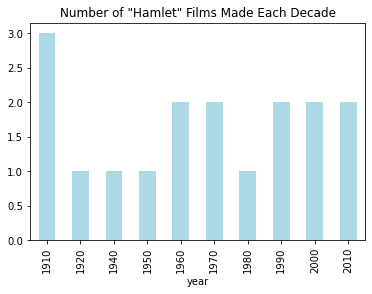

In [273]:
# question 2.4:
Hamlet = cast[cast.title=='Hamlet'].drop_duplicates(subset=['year'])
# Groupby of all Hamlet films over the years by decades and graph creation by plot.
Hamlet.groupby(Hamlet.year // 10 * 10).size().plot(kind='bar' , color='LightBlue' , title='Number of "Hamlet" Films Made Each Decade')

In [277]:
# question 2.5:
# I filtered the rows with n=1 and their year in the range 1950-1959.
leading = cast[(cast.n == 1.0)&(cast.year >= 1950)&(cast.year < 1960)]
# Groupby year and type:
pd.DataFrame(leading.groupby(['year','type']).size())

0
year type        
1950 actor    604
     actress  271
1951 actor    633
     actress  272
1952 actor    591
     actress  284
1953 actor    634
     actress  290
1954 actor    626
     actress  298
1955 actor    606
     actress  264
1956 actor    614
     actress  288
1957 actor    708
     actress  284
1958 actor    694
     actress  275
1959 actor    678
     actress  287

In [281]:
# question 2.6:
# I filtered the rows with n=1 and their year since 1990.
leading2 = cast[(cast.n == 1.0)&(cast.year >= 1990)]
# Groupby name, and the quantity of each name.
leading3 = leading2.groupby(leading2.name).size()
# I sort the data frame from the largest quantity to the smallest.
# Then I took the first 10 (with the highest amount).
pd.DataFrame(leading3.sort_values(ascending=False).head(10))

,0
name,
Mohanlal,126
Mammootty,118
Akshay Kumar,87
Jayaram,76
Andy Lau,72
Ajay Devgn,69
Eric Roberts,68
Amitabh Bachchan,68
Nagarjuna Akkineni,60


In [285]:
# question 2.7:
# I filtered from the cast the lines where the name is Frank Oz.
FrankOz = cast[cast.name == "Frank Oz"]
# Groupby year and title and the amount of each one.
FrankOz = FrankOz.groupby(['year','title']).size()
# I filterd by the amount
# I left only the movies in which he played more than one role.
FrankOz = FrankOz[FrankOz >1]
pd.DataFrame(FrankOz)

0
year title                                      
1979 The Muppet Movie                          8
1981 An American Werewolf in London            2
     The Great Muppet Caper                    6
1982 The Dark Crystal                          2
1984 The Muppets Take Manhattan                7
1985 Sesame Street Presents: Follow that Bird  3
1992 The Muppet Christmas Carol                7
1996 Muppet Treasure Island                    4
1999 Muppets from Space                        4
     The Adventures of Elmo in Grouchland      3